In [1]:
import torch
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms


import utils as utils
import model as model
from model import Net, model_train, model_test, model_summary

In [2]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

CUDA Available? False


##### Download the training and the test data

In [3]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=model.train_transforms())
test_data = datasets.MNIST('../data', train=False, download=True, transform=model.test_transforms())

##### Build the dataloaders

In [4]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True,}
test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

##### Look at some of the data

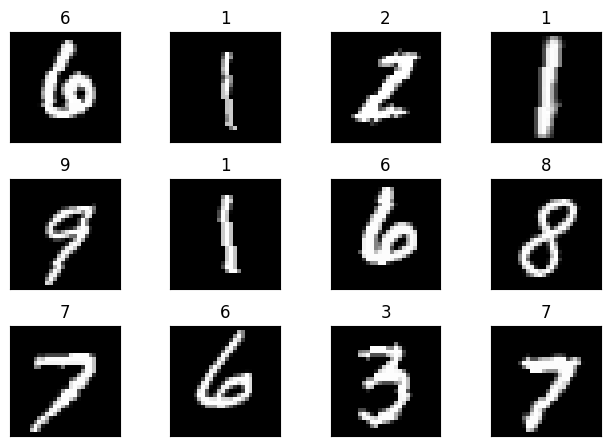

In [5]:
utils.return_dataset_images(train_loader, 12)

##### Initialize variables to use in making plots later on

In [6]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

In [7]:
device = "cpu"
model = Net().to(device)
model_summary(model,(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------


##### Train a model

In [9]:

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
#criterion = nn.CrossEntropyLoss()
criterion = F.nll_loss
num_epochs = 5

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train_acc, train_losses = model_train(model, 
                                        device, 
                                        train_loader,
                                        optimizer, 
                                        criterion, 
                                        train_acc,
                                        train_losses,)
  test_acc, test_losses = model_test(model, 
                                     device, 
                                     test_loader, 
                                     criterion,
                                     test_acc,
                                     test_losses)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.1921 Batch_id=117 Accuracy=93.92: 100%|██████████| 118/118 [00:49<00:00,  2.37it/s]


Test set: Average loss: 0.0865, Accuracy: 9737/10000 (97.37%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.1855 Batch_id=117 Accuracy=96.49: 100%|██████████| 118/118 [00:48<00:00,  2.42it/s]


Test set: Average loss: 0.0620, Accuracy: 9803/10000 (98.03%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.0517 Batch_id=117 Accuracy=97.02: 100%|██████████| 118/118 [00:49<00:00,  2.37it/s]


Test set: Average loss: 0.0483, Accuracy: 9843/10000 (98.43%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.0665 Batch_id=117 Accuracy=97.67: 100%|██████████| 118/118 [00:48<00:00,  2.43it/s]


Test set: Average loss: 0.0473, Accuracy: 9855/10000 (98.55%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0166 Batch_id=117 Accuracy=97.94: 100%|██████████| 118/118 [00:48<00:00,  2.44it/s]


Test set: Average loss: 0.0395, Accuracy: 9866/10000 (98.66%)

Adjusting learning rate of group 0 to 1.0000e-02.


##### Visualize the training performance 

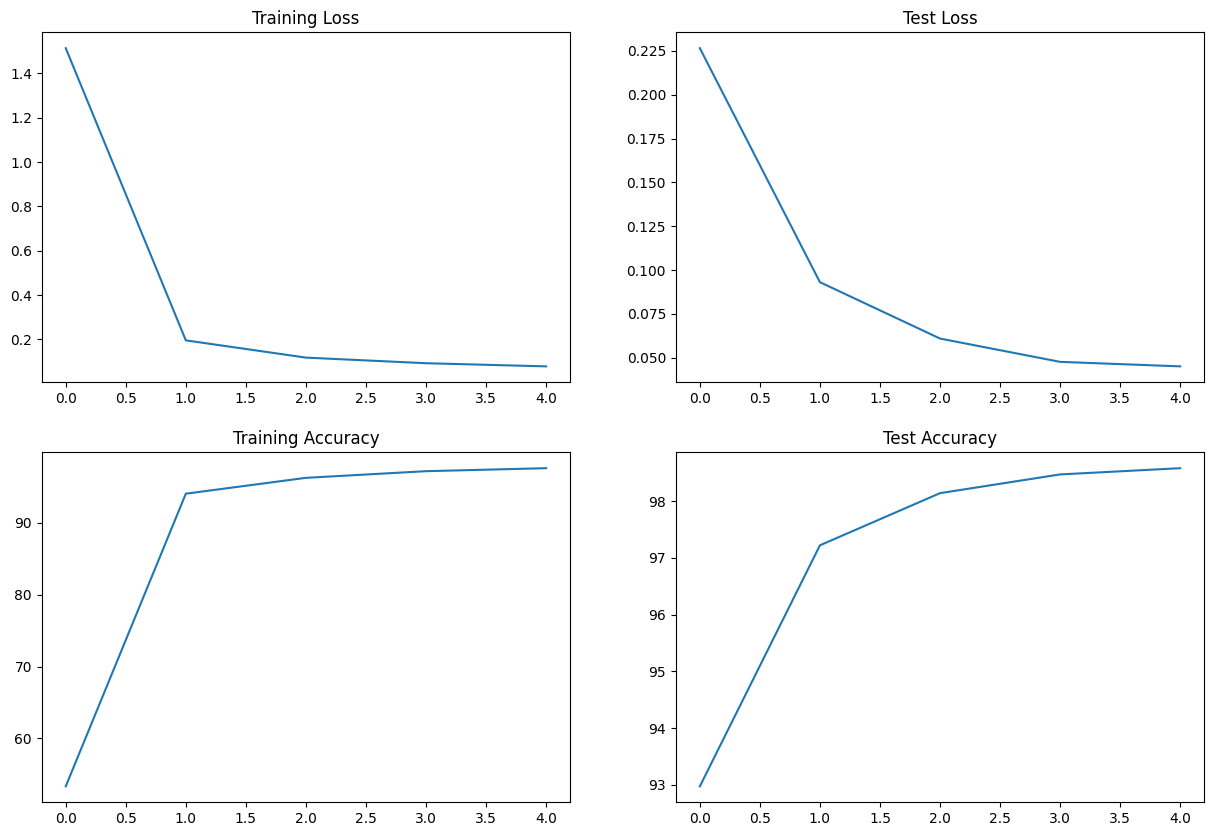

In [8]:
utils.plot_losses_accuracies(train_acc, train_losses, test_acc, test_losses,)